## Required Python Packages

In [1]:
#Install dependencies
#All OS
!pip install pandas numpy matplotlib sklearn
#MacOS(M1) - Individual
!pip3 install torch torchvision torchaudio
!pip3 install tensorflow-macos tensorflow-metal
#Linux(AMD) - Individual
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/rocm5.6
#!pip3 install tensorflow tensorflow-rocm

# GUI

Error: Invalid shape
Error: Invalid shape


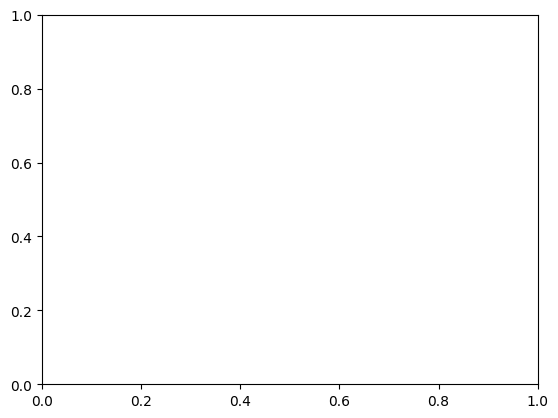

In [2]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from plot_bci import *
# from model_bci import *

LARGEFONT =("Verdana", 35)

class tkinterApp(tk.Tk):
    # __init__ function for class tkinterApp 
    def __init__(self, *args, **kwargs): 
        # __init__ function for class Tk
        tk.Tk.__init__(self, *args, **kwargs)
        # creating a container
        container = tk.Frame(self)  
        container.pack(side = "top", fill = "both", expand = True) 
        container.grid_rowconfigure(0, weight = 1)
        container.grid_columnconfigure(0, weight = 1)
        # initializing frames to an empty array
        self.frames = {}  
        # iterating through a tuple consisting
        # of the different page layouts
        for F in (Home, LiveFeed, Recorded, Model):
            frame = F(container, self)
            # initializing frame of that object from
            # startpage, page1, page2 respectively with 
            # for loop
            self.frames[F] = frame 
            frame.grid(row = 0, column = 0, sticky ="nsew")
        self.show_frame(Home)
    # to display the current frame passed as
    # parameter
    def show_frame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()

#first window frame startpage
class Home(tk.Frame):
    def __init__(self, parent, controller): 
        tk.Frame.__init__(self, parent)
        # label of frame Layout 2
        label = ttk.Label(self, text ="BCI Infinty", font = LARGEFONT)
        # putting the grid in its place by using
        # grid
        label.grid(row = 0, column = 4, padx = 10, pady = 10) 
        button1 = ttk.Button(self, text ="Live Feed",
        command = lambda : controller.show_frame(LiveFeed))
        # putting the button in its place by
        # using grid
        button1.grid(row = 1, column = 1, padx = 10, pady = 10)
        ## button to show frame 2 with text layout2
        button2 = ttk.Button(self, text ="Recorded Data",
        command = lambda : controller.show_frame(Recorded))
        # putting the button in its place by
        # using grid
        button2.grid(row = 2, column = 1, padx = 10, pady = 10)
        ## button to show model selection frame with
        button3 = ttk.Button(self, text ="Model Selection",
        command = lambda : controller.show_frame(Model))
        # putting the button in its place by
        # using grid
        button3.grid(row = 3, column = 1, padx = 10, pady = 10)

#second window frame page1 
class LiveFeed(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = ttk.Label(self, text ="Live Feed", font = LARGEFONT)
        #Later: Add a text input box for the user to enter the name of the file to be saved
        #Add a button to start live feed
        #Add a button to start recording
        #Add a button to stop recording
        label.grid(row = 0, column = 4, padx = 10, pady = 10)
        button1 = ttk.Button(self, text ="Home",
                            command = lambda : controller.show_frame(Home))
        # putting the button in its place 
        # by using grid
        button1.grid(row = 1, column = 1, padx = 10, pady = 10)

#third window frame page2
class Recorded(tk.Frame): 
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = ttk.Label(self, text ="Recorded", font = LARGEFONT)
        label.grid(row = 0, column = 4, padx = 10, pady = 10)
        button1 = ttk.Button(self, text ="Home",
                            command = lambda : controller.show_frame(Home))
        # putting the button in its place 
        # by using grid
        button1.grid(row = 1, column = 1, padx = 10, pady = 10)
        #Add text input for filename, and call input_bci.py to read the data
        file_path = filedialog.askopenfilename()
        #Add button to start playback
        channel = 8
        button2 = ttk.Button(self, text ="Playback EEG",
                            command = plot_eeg(file_path, channel))
        # putting the button in its place
        # by using grid
        button2.grid(row = 2, column = 1, padx = 10, pady = 10)
        alpha = 3
        button3 = ttk.Button(self, text ="Playback Aplha",
                            command = plot_eeg(file_path, alpha))
        # putting the button in its place
        # by using grid
        button3.grid(row = 1, column = 2, padx = 10, pady = 10)
        #call plot_bci.py to plot the data
        #Add button to stop playback


#Page 3: Model Selection, Data Input, Training, and Testing, and Result Visualization
class Model(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = ttk.Label(self, text ="Model Selection", font = LARGEFONT)
        label.grid(row = 0, column = 4, padx = 10, pady = 10)
        button1 = ttk.Button(self, text ="Home",
                            command = lambda : controller.show_frame(Home))
        # putting the button in its place 
        # by using grid
        button1.grid(row = 1, column = 1, padx = 10, pady = 10)

# Driver Code
app = tkinterApp()
app.mainloop()